## *Дополнительные задания:
1). Загрузите датасет Wine из встроенных датасетов sklearn.datasets с помощью функции load_wine в
переменную data.
2). Полученный датасет не является датафреймом. Это структура данных, имеющая ключи
аналогично словарю. Просмотрите тип данных этой структуры данных и создайте список data_keys,
содержащий ее ключи.
3). Просмотрите данные, описание и названия признаков в датасете. Описание нужно вывести в виде
привычного, аккуратно оформленного текста, без обозначений переноса строки, но с самими
переносами и т.д.
4). Сколько классов содержит целевая переменная датасета? Выве
дите названия классов.
5). На основе данных датасета (они содержатся в двумерном массиве Numpy) и названий признаков
создайте датафрейм под названием X.
6). Выясните размер датафрейма X и установите, имеются ли в нем пропущенные значения.
7). Добавьте в датафрейм поле с классами вин в виде чисел, имеющих тип данных numpy.int64.
Название поля - 'target'.
8). Постройте матрицу корреляций для всех полей X. Дайте полученному датафрейму название
X_corr.
9). Создайте список high_corr из признаков, корреляция которых с полем target по абсолютному
значению превышает 0.5 (причем, само поле target не должно входить в этот список).
10). Удалите из датафрейма X поле с целевой переменной. Для всех признаков, названия которых
содержатся в списке high_corr, вычислите квадрат их значений и добавьте в датафрейм X
соответствующие поля с суффиксом '_2', добавленного к первоначальному названию признака.
Итоговый датафрейм должен содержать все поля, которые, были в нем изначально, а также поля с
признаками из списка high_corr, возведенными в квадрат. Выведите описание полей датафрейма X с
помощью метода describe.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_wine

## 1)
Загрузите датасет Wine из встроенных датасетов sklearn.datasets с помощью функции load_wine в переменную data.

In [3]:
wine = load_wine()

## 2) 
Полученный датасет не является датафреймом. Это структура данных, имеющая ключи
аналогично словарю. Просмотрите тип данных этой структуры данных и создайте список data_keys,
содержащий ее ключи.

In [4]:
data_keys = wine.keys()
data_keys

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

## 3)
Просмотрите данные, описание и названия признаков в датасете. Описание нужно вывести в виде
привычного, аккуратно оформленного текста, без обозначений переноса строки, но с самими
переносами и т.д.

In [5]:
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [6]:
features = wine['feature_names']
features

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

## 4)
Сколько классов содержит целевая переменная датасета? Выве
дите названия классов.

In [7]:
target = wine['target']
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [8]:
wine['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [9]:
# Сколько классов содержит целевая переменная датасета? Выведите названия классов.
target = pd.Series(target, dtype='int')
target.value_counts()

1    71
0    59
2    48
dtype: int64

In [10]:
target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 178 entries, 0 to 177
Series name: None
Non-Null Count  Dtype
--------------  -----
178 non-null    int64
dtypes: int64(1)
memory usage: 1.5 KB


## 5)
На основе данных датасета (они содержатся в двумерном массиве Numpy) и названий признаков создайте датафрейм под названием X.

In [11]:
X = pd.DataFrame(wine['data'], columns=wine['feature_names'])
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## 6)
Выясните размер датафрейма X и установите, имеются ли в нем пропущенные значения.

In [12]:

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

## 7)
Добавьте в датафрейм поле с классами вин в виде чисел, имеющих тип данных numpy.int64. Название поля - 'target'.

In [13]:
X['target'] = wine['target']

## 8)
Постройте матрицу корреляций для всех полей X. Дайте полученному датафрейму название X_corr

In [14]:
X_corr = X.corr()
X_corr

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


## 9)
Создайте список high_corr из признаков, корреляция которых с полем target по абсолютному 
значению превышает 0.5 (причем, само поле target не должно входить в этот список)

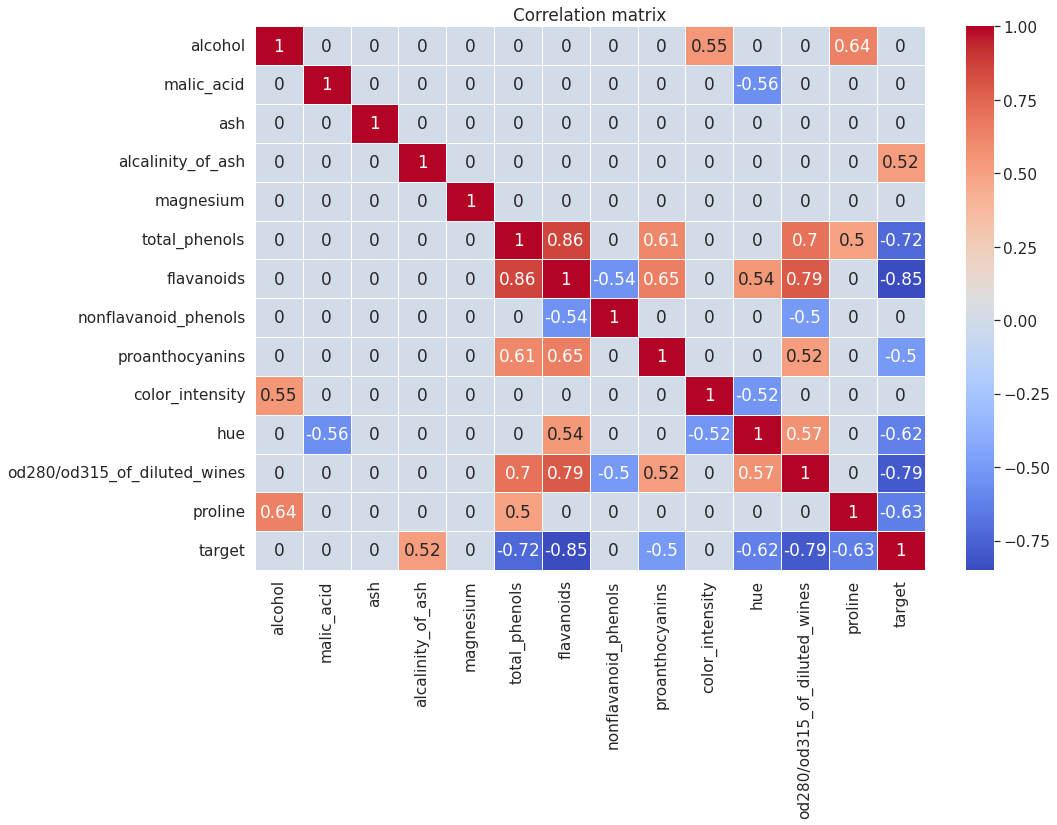

In [26]:
plt.figure(figsize = (15,10))
sns.set(font_scale=1.4)

corr_matrix = X_corr
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.5] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

In [27]:
high_corr = corr_matrix[(abs(corr_matrix) >= 0.5)]['target']
high_corr

alcohol                          NaN
malic_acid                       NaN
ash                              NaN
alcalinity_of_ash               0.52
magnesium                        NaN
total_phenols                  -0.72
flavanoids                     -0.85
nonflavanoid_phenols             NaN
proanthocyanins                -0.50
color_intensity                  NaN
hue                            -0.62
od280/od315_of_diluted_wines   -0.79
proline                        -0.63
target                          1.00
Name: target, dtype: float64

In [28]:
high_corr = high_corr.drop(high_corr[high_corr.isna()].index)
high_corr = high_corr.drop('target')
high_corr

alcalinity_of_ash               0.52
total_phenols                  -0.72
flavanoids                     -0.85
proanthocyanins                -0.50
hue                            -0.62
od280/od315_of_diluted_wines   -0.79
proline                        -0.63
Name: target, dtype: float64

In [29]:
high_corr.info()

<class 'pandas.core.series.Series'>
Index: 7 entries, alcalinity_of_ash to proline
Series name: target
Non-Null Count  Dtype  
--------------  -----  
7 non-null      float64
dtypes: float64(1)
memory usage: 412.0+ bytes


In [19]:
high_corr = high_corr.index

In [20]:
high_corr

Index(['alcalinity_of_ash', 'total_phenols', 'flavanoids', 'proanthocyanins',
       'hue', 'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [21]:
### Что-то как-то долго это вычисляется. Не смог придумать как проще сделать.

## 10) 
Удалите из датафрейма X поле с целевой переменной. Для всех признаков, названия которых
содержатся в списке high_corr, вычислите квадрат их значений и добавьте в датафрейм X
соответствующие поля с суффиксом '_2', добавленного к первоначальному названию признака.
Итоговый датафрейм должен содержать все поля, которые, были в нем изначально, а также поля с
признаками из списка high_corr, возведенными в квадрат. Выведите описание полей датафрейма X с
помощью метода describe.

In [22]:
X = X.drop('target', axis=1)
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [23]:
for name in high_corr:
    X[f"{name}_2"] = X[name] ** 2

In [24]:
X.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,alcalinity_of_ash_2,total_phenols_2,flavanoids_2,proanthocyanins_2,hue_2,od280/od315_of_diluted_wines_2,proline_2
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,243.36,7.8400,9.3636,5.2441,1.0816,15.3664,1134225.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,125.44,7.0225,7.6176,1.6384,1.1025,11.5600,1102500.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,345.96,7.8400,10.4976,7.8961,1.0609,10.0489,1404225.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,282.24,14.8225,12.1801,4.7524,0.7396,11.9025,2190400.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,441.00,7.8400,7.2361,3.3124,1.0816,8.5849,540225.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,231.04,10.6929,11.4921,3.8809,1.1025,8.1225,2102500.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,213.16,6.2500,6.3504,3.9204,1.0404,12.8164,1664100.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,309.76,6.7600,6.3001,1.5625,1.1236,12.8164,1677025.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,196.00,7.8400,8.8804,3.9204,1.1664,8.1225,1092025.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,256.00,8.8804,9.9225,3.4225,1.0201,12.6025,1092025.0


In [25]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,alcalinity_of_ash_2,total_phenols_2,flavanoids_2,proanthocyanins_2,hue_2,od280/od315_of_diluted_wines_2,proline_2
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,1.780000e+02
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,391.142865,5.657030,5.110049,2.856713,0.968661,7.322155,6.564591e+05
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,133.671775,2.936294,4.211441,2.047930,0.443798,3.584316,5.558591e+05
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,112.360000,0.960400,0.115600,0.168100,0.230400,1.612900,7.728400e+04
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,295.840000,3.036325,1.452100,1.562500,0.612325,3.754075,2.505010e+05
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,380.250000,5.546050,4.558250,2.418050,0.931250,7.728400,4.536045e+05
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,462.250000,7.840000,8.265700,3.802500,1.254400,10.048900,9.702250e+05
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,900.000000,15.054400,25.806400,12.816400,2.924100,16.000000,2.822400e+06
